Gather data using sklearn as helper

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

In [2]:
data = np.c_[california_housing["data"], california_housing["target"]]
names = np.r_[california_housing["feature_names"], california_housing["target_names"]]

Let's create smarty.DataSet from this data and set "MedHouseVal" as out target class

In [3]:
from smarty.datasets import DataSet

ds = DataSet().from_object(data, columns=names)
ds.set_target_classes("MedHouseVal")

/Users/user/Desktop/projects/ml/smarty/datasets/datasets.py:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  col[np.where(col=='')] = np.nan # fill empty cells


In [4]:
ds.info()


DataSet at 0x110d6cbe0
	Rows: 20640
	Cols: 9

	name           	          dtype
	MedInc         	        float16
	HouseAge       	          uint8
	AveRooms       	        float16
	AveBedrms      	        float16
	Population     	         uint16
	AveOccup       	        float16
	Latitude       	        float16
	Longitude      	        float16
	MedHouseVal    	        float16



Split data into training dataset and test dataset with default split_ratio=0.8

In [5]:
from smarty.datasets.utils import train_test_split

ds.batch(32).repeat(True)
train_ds, test_ds = train_test_split(ds)

In [6]:
from smarty.models.linear import LinearRegression

lr = LinearRegression(solver="norm_eq")
lr.fit(train_ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting training model for 1 epochs.
Epoch 1/1
	Step 1/1 - loss: 0.5283671552156928, 



<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 516/516



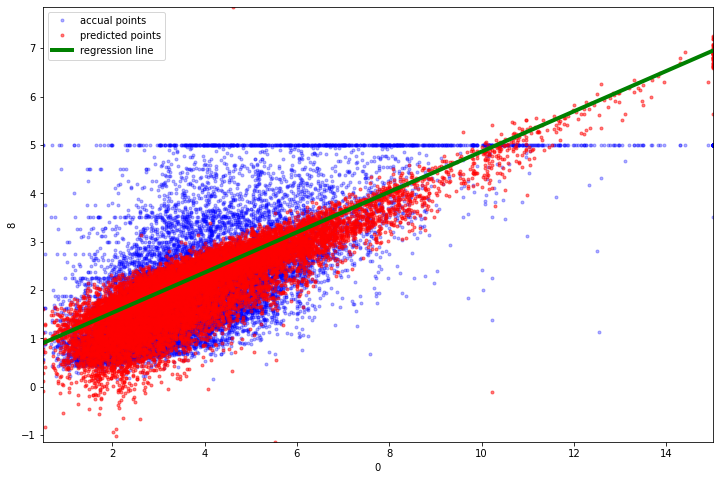

In [7]:
lr.plot(train_ds)

In [8]:
lr.evaluate(test_ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 129/129

Loss: 0.5421826800860303.


In [9]:
lr.bias_, lr.coefs_

(array([-36.33834476]),
 array([[ 4.44855693e-01],
        [ 9.40615874e-03],
        [-1.20567681e-01],
        [ 6.61787351e-01],
        [-7.66005576e-06],
        [-4.14765743e-03],
        [-4.14658723e-01],
        [-4.27715103e-01]]))

Let's try to train linear regression with mini-batch gradient descent running for 100 epochs

In [10]:
lr2 = LinearRegression(solver="mbgd")
lr2.fit(train_ds, epochs=100)
lr2.evaluate(test_ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting training model for 100 epochs.
Epoch 1/100
	Step 516/516 - loss: 13.840944506070041,  - loss: 17.88146542777043, 

Epoch 2/100
	Step 516/516 - loss: 11.20633869447817,  

Epoch 3/100
	Step 516/516 - loss: 10.608568305516322, oss: 10.898510711353879, loss: 13.684772149896586, 

Epoch 4/100
	Step 516/516 - loss: 10.295388933241519, oss: 9.549280481471612,  - loss: 11.214904566665732, 

Epoch 5/100
	Step 516/516 - loss: 10.089943203650629,  - loss: 11.450615421687042, 

Epoch 6/100
	Step 516/516 - loss: 9.933467153775918,  loss: 9.84529819493046, 

Epoch 7/100
	Step 516/516 - loss: 9.804955115232676,  

Epoch 8/100
	Step 516/516 - loss: 9.679959355903712,  

Epoch 9/100
	Step 516/516 - loss: 9.557602499235859,   - loss: 7.871929595037083, 

Epoch 10/100
	Step 516/516 - loss: 9.437408765413874,  ss: 8.072552681022954, 

Epoch 11/100
	Step 516/516 - loss: 9.31911546295607,   oss: 9.088942990141522, loss: 10.449776491770926, 

Epoch 12/1

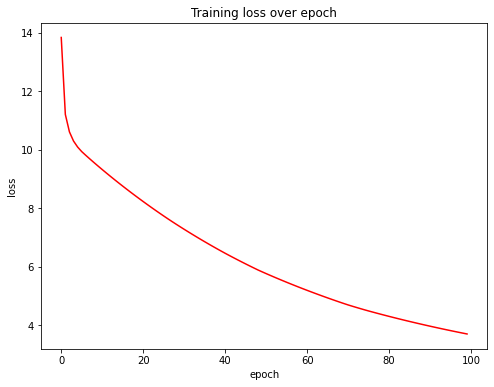

In [11]:
# plot training curves
lr2.plot_training()

In [12]:
lr2.bias_, lr2.coefs_

(array([[0.00436328]]),
 array([[0.99920792],
        [0.3389372 ],
        [0.98237117],
        [0.99765849],
        [0.00168339],
        [0.28451244],
        [1.12620711],
        [0.51007774]]))

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 516/516



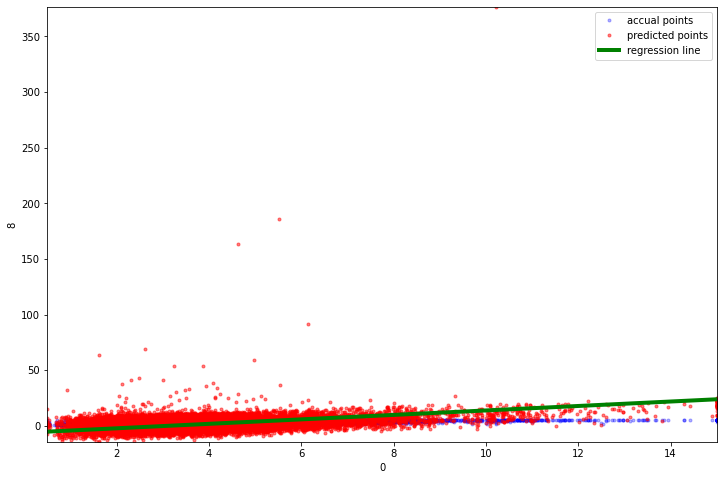

In [13]:
lr2.plot(train_ds)

Compare scores to sklearn's sgd linear model

In [14]:
from sklearn.linear_model import SGDRegressor

lr = SGDRegressor()
lr.fit(ds.get_data_classes(), ds.get_target_classes().ravel())

SGDRegressor()

In [15]:
lr.coef_, lr.intercept_

(array([ 6.03049787e+10, -5.08627350e+11, -4.03192909e+10,  5.70793776e+09,
        -7.35449802e+09,  6.80378006e+10, -6.16148130e+11,  7.61369451e+11]),
 array([-2.79312113e+09]))

In [16]:
lr.n_iter_

43